<a href="https://colab.research.google.com/github/Khotso-Bore/neural-languange-model/blob/Fine-Tuning/AfroXLMR_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers

In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
setswana_url = 'https://raw.githubusercontent.com/NLPforLRLsProjects/SAfriSenti-Corpus/refs/heads/main/setswana_tweets.csv'
sesotho_url = 'https://raw.githubusercontent.com/NLPforLRLsProjects/SAfriSenti-Corpus/refs/heads/main/sesotho_tweets.csv'

so_df = pd.read_csv(sesotho_url)

In [4]:
# ts_df.head()

In [5]:
# ts_df.value_counts

In [6]:
so_df.head()

,sentence,Final_labels,predict_name
0,@user gwa tshwana rena ba bang a re kreye selo...,negative,Sesotho
1,e bata goal spurs,neutral,Sesotho
2,@user @user ke nahana taba eno ea ho batla ho ...,negative,multi
3,@user lotho hle empa fela ke ipotela,positive,Sesotho
4,@user @user keu utloa hantle,positive,Sesotho


In [7]:
so_df.value_counts

<bound method DataFrame.value_counts of                                                sentence Final_labels  \
0     @user gwa tshwana rena ba bang a re kreye selo...     negative   
1                                     e bata goal spurs      neutral   
2     @user @user ke nahana taba eno ea ho batla ho ...     negative   
3                  @user lotho hle empa fela ke ipotela     positive   
4                          @user @user keu utloa hantle     positive   
...                                                 ...          ...   
2995  @user @user ntho diqala jwalo rumoursthe knes ...     negative   
2996  @user iΓö£┬╗Γö¼Γò£m on leave ntse ke sheba hen...     negative   
2997  he must come to botswana a re thuse that bogus...     negative   
2998  @user wa bona ea hlokomela something fishy moh...     negative   
2999  @user ebe ulto etsang ngoaneso with the traffi...     negative   

     predict_name  
0         Sesotho  
1         Sesotho  
2           multi  
3         Sesotho  
4         Sesotho  
...           ...  
2995      Sesotho  
2996      Sesotho  
2997        multi  
2998      Sesotho  
2999      Sesotho  

[3000 rows x 3 columns]>

In [8]:
def clean_tweets(text):
    if pd.isnull(text):
        return ""


    if pd.isnull(text):
        return ""

    # Remove mentions, URLs, hashtags, digits (keep diacritics)
    text = re.sub(r'@\w+|https?\S+|www\S+|#|\d+', '', text)

    # Keep Sesotho punctuation (e.g., "’") but remove others
    text = re.sub(r'[^\w\s’]', '', text)

    #remove URLs
    text = re.sub(r'https\S+|www\S+', '', text)

    #Remove Hashtags
    text = re.sub(r'[^\w\s]', '', text)

    # Remove digits (optional)
    text = re.sub(r'\d+', '', text)

    # Remove emojis (optional)
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Remove extra whitespace (keep lowercase)
    return re.sub(r'\s+', ' ', text).strip().lower()

    return text.lower()


In [9]:
# ts_df['cleaned_sent'] = ts_df['sentence'].apply(clean_tweets)
# ts_df.head()

In [10]:
so_df['cleaned_sent']= so_df['sentence'].apply(clean_tweets)
so_df.head()

,sentence,Final_labels,predict_name,cleaned_sent
0,@user gwa tshwana rena ba bang a re kreye selo...,negative,Sesotho,gwa tshwana rena ba bang a re kreye selo mos
1,e bata goal spurs,neutral,Sesotho,e bata goal spurs
2,@user @user ke nahana taba eno ea ho batla ho ...,negative,multi,ke nahana taba eno ea ho batla ho khetha hoban...
3,@user lotho hle empa fela ke ipotela,positive,Sesotho,lotho hle empa fela ke ipotela
4,@user @user keu utloa hantle,positive,Sesotho,keu utloa hantle


In [11]:
# print(ts_df.isnull().sum())
print(so_df.isnull().sum())


sentence        0
Final_labels    0
predict_name    0
cleaned_sent    0
dtype: int64


In [12]:
# ts_df['predict_name'].fillna('unknown', inplace=True)
so_df['predict_name'].fillna('unknown', inplace=True)

<ipython-input-12-1198442071>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  so_df['predict_name'].fillna('unknown', inplace=True)


In [13]:
# print(ts_df.isnull().sum())

In [14]:
# Rename column for consistency and map labels
so_df.rename(columns={'Final_labels': 'label'}, inplace=True)
label_map = {'positive': 0, 'negative': 1, 'neutral': 2}
so_df['label'] = so_df['label'].map(label_map)

# Verify label distribution
print(so_df['label'].value_counts())

label
1    1464
0     953
2     583
Name: count, dtype: int64


In [19]:
so_df.head()

,sentence,label,predict_name,cleaned_sent
0,@user gwa tshwana rena ba bang a re kreye selo...,1,Sesotho,gwa tshwana rena ba bang a re kreye selo mos
1,e bata goal spurs,2,Sesotho,e bata goal spurs
2,@user @user ke nahana taba eno ea ho batla ho ...,1,multi,ke nahana taba eno ea ho batla ho khetha hoban...
3,@user lotho hle empa fela ke ipotela,0,Sesotho,lotho hle empa fela ke ipotela
4,@user @user keu utloa hantle,0,Sesotho,keu utloa hantle


In [15]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    so_df['cleaned_sent'], so_df['label'], test_size=0.2, random_state=42
)

In [16]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("Davlan/afro-xlmr-large")

# Tokenize datasets
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=128)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [17]:
import torch

class SesothoDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SesothoDataset(train_encodings, train_labels)
test_dataset = SesothoDataset(test_encodings, test_labels)

In [20]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "Davlan/afro-xlmr-large", num_labels=3
)

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=5,
    per_device_train_batch_size=8,
    eval_strategy="epoch",
    logging_steps=10,
    learning_rate=2e-5,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at Davlan/afro-xlmr-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: u21556564 (u21556564-university-of-pretoria) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,1.221200,1.017677
2,1.074500,0.908063
3,0.885000,0.923038
4,0.929000,0.890234
5,0.735400,0.926701


TrainOutput(global_step=1500, training_loss=0.9680114459991455, metrics={'train_runtime': 1664.9749, 'train_samples_per_second': 7.207, 'train_steps_per_second': 0.901, 'total_flos': 2009483791776000.0, 'train_loss': 0.9680114459991455, 'epoch': 5.0})

In [21]:

# Get predictions
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1)

# True labels
true_labels = test_labels.tolist()  # Convert to list if needed

Classification Report:
              precision    recall  f1-score   support

    positive       0.46      0.33      0.39       183
    negative       0.66      0.79      0.72       315
     neutral       0.53      0.47      0.50       102

    accuracy                           0.60       600
   macro avg       0.55      0.53      0.53       600
weighted avg       0.58      0.60      0.58       600

Accuracy: 0.5967
Weighted F1: 0.5805
Macro F1: 0.5348


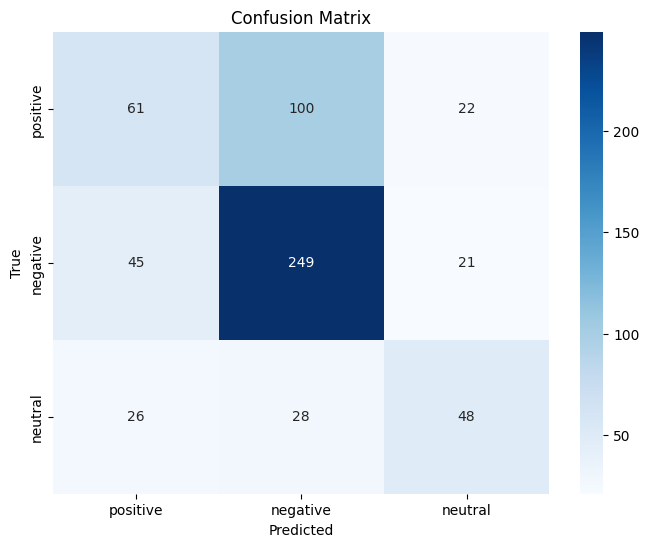

In [22]:
# Classification Report (includes F1, precision, recall per class + accuracy)
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=list(label_map.keys())))

# Individual Metrics
print(f"Accuracy: {accuracy_score(true_labels, preds):.4f}")
print(f"Weighted F1: {f1_score(true_labels, preds, average='weighted'):.4f}")
print(f"Macro F1: {f1_score(true_labels, preds, average='macro'):.4f}")

# Confusion Matrix
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_map.keys(),
            yticklabels=label_map.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Binarize labels for ROC AUC (only for binary/multiclass)
if len(label_map) == 2:  # Binary
    roc_auc = roc_auc_score(true_labels, predictions.predictions[:, 1])
    print(f"ROC AUC: {roc_auc:.4f}")
else:  # Multiclass (One-vs-Rest)
    y_true_bin = label_binarize(true_labels, classes=[0, 1, 2])
    roc_auc = roc_auc_score(y_true_bin, predictions.predictions, multi_class='ovr')
    print(f"ROC AUC (One-vs-Rest): {roc_auc:.4f}")

ROC AUC (One-vs-Rest): 0.6719


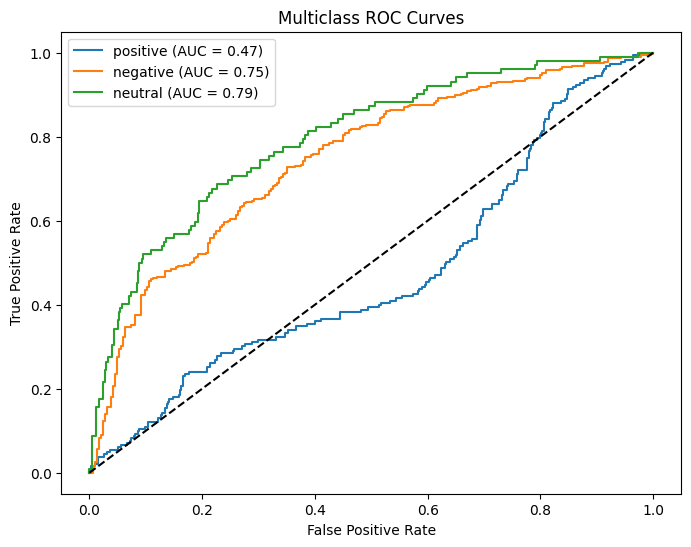

In [24]:
# Plot ROC curves for each class (multiclass)
if len(label_map) > 2:
    y_true_bin = label_binarize(true_labels, classes=[0, 1, 2])
    fpr, tpr, roc_auc = {}, {}, {}

    for i, class_name in enumerate(label_map.keys()):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions.predictions[:, i])
        roc_auc[i] = roc_auc_score(y_true_bin[:, i], predictions.predictions[:, i])

    plt.figure(figsize=(8, 6))
    for i in range(len(label_map)):
        plt.plot(fpr[i], tpr[i], label=f'{list(label_map.keys())[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curves')
    plt.legend()
    plt.show()

In [25]:
import json

metrics = {
    'accuracy': accuracy_score(true_labels, preds),
    'weighted_f1': f1_score(true_labels, preds, average='weighted'),
    'macro_f1': f1_score(true_labels, preds, average='macro'),
    'roc_auc': roc_auc_score(y_true_bin, predictions.predictions, multi_class='ovr')
}

with open('metrics.json', 'w') as f:
    json.dump(metrics, f, indent=4)

In [28]:
model.save_pretrained("./sesotho_sentiment_model")
tokenizer.save_pretrained("./sesotho_sentiment_model")

('./sesotho_sentiment_model/tokenizer_config.json',
 './sesotho_sentiment_model/special_tokens_map.json',
 './sesotho_sentiment_model/sentencepiece.bpe.model',
 './sesotho_sentiment_model/added_tokens.json',
 './sesotho_sentiment_model/tokenizer.json')

In [31]:
from google.colab import drive
drive.mount('/content/drive')

model.save_pretrained("/content/drive/MyDrive/AfroXLMR-Sesotho")
tokenizer.save_pretrained("/content/drive/MyDrive/AfroXLMR-Sesotho")

Mounted at /content/drive


('/content/drive/MyDrive/AfroXLMR-Sesotho/tokenizer_config.json',
 '/content/drive/MyDrive/AfroXLMR-Sesotho/special_tokens_map.json',
 '/content/drive/MyDrive/AfroXLMR-Sesotho/sentencepiece.bpe.model',
 '/content/drive/MyDrive/AfroXLMR-Sesotho/added_tokens.json',
 '/content/drive/MyDrive/AfroXLMR-Sesotho/tokenizer.json')